# Diamonds dataset (appropriate for a regression task)

In [ ]:
#https://www.kaggle.com/datasets/shivam2503/diamonds?select=diamonds.csv

!gdown --id 1bHj-moS7gGHoPy9zRvcXFCx1A0T1K9ok

In [ ]:
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


*   **statistical parameters**

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000



*   **visualization**

---

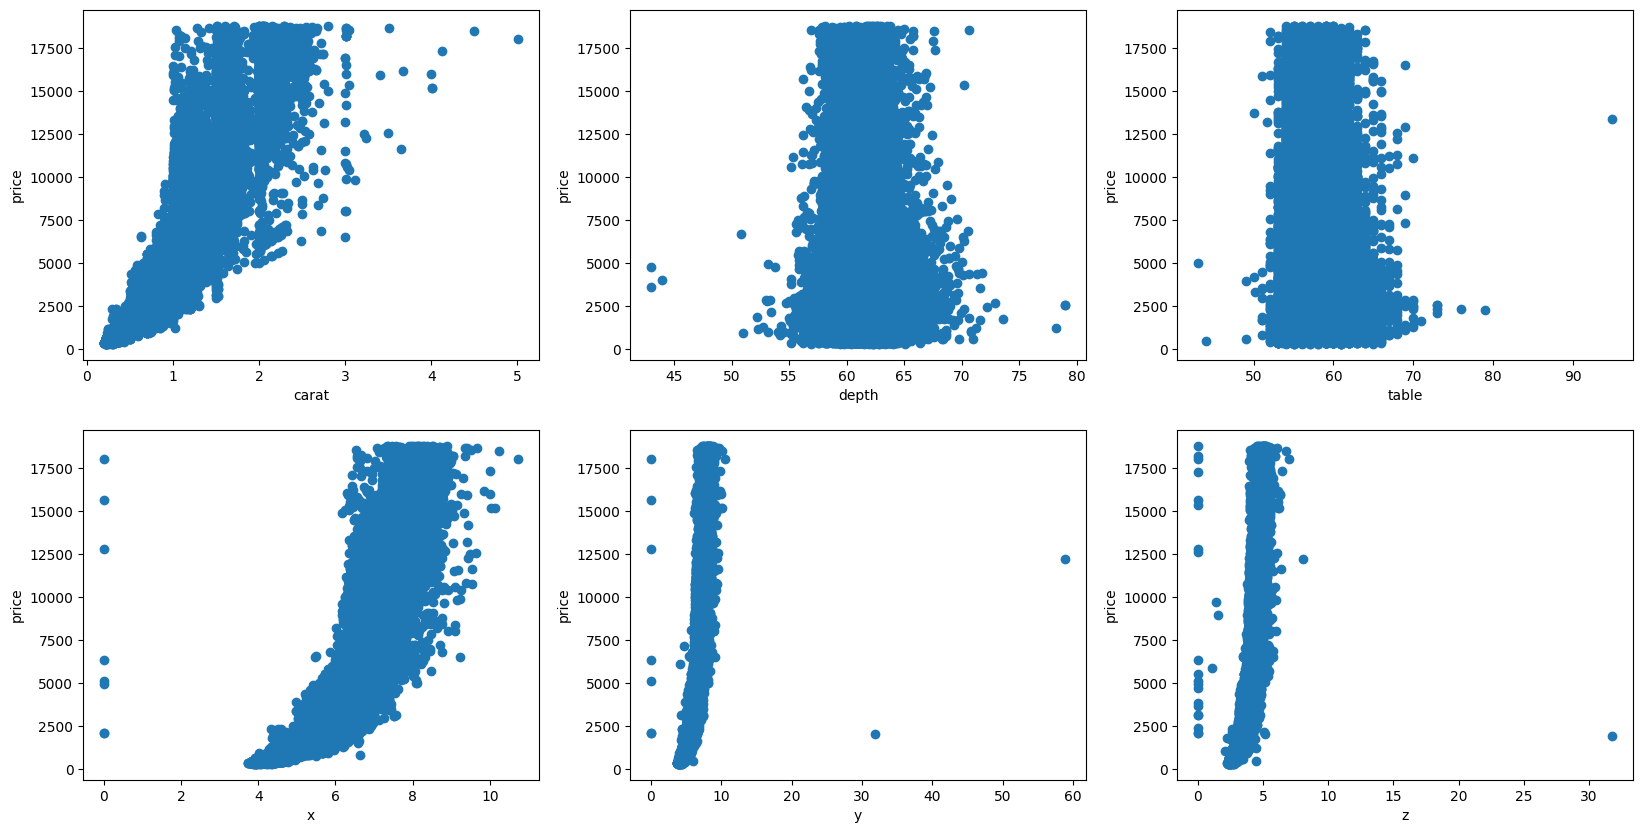

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(df.carat,df.price)
plt.xlabel('carat')
plt.ylabel('price')

plt.subplot(2, 3, 2)
plt.scatter(df.depth,df.price)
plt.xlabel('depth')
plt.ylabel('price')

plt.subplot(2, 3, 3)
plt.scatter(df.table,df.price)
plt.xlabel('table')
plt.ylabel('price')

plt.subplot(2, 3, 4)
plt.scatter(df.x,df.price)
plt.xlabel('x')
plt.ylabel('price')

plt.subplot(2, 3, 5)
plt.scatter(df.y,df.price)
plt.xlabel('y')
plt.ylabel('price')

plt.subplot(2, 3, 6)
plt.scatter(df.z,df.price)
plt.xlabel('z')
plt.ylabel('price')

plt.show()

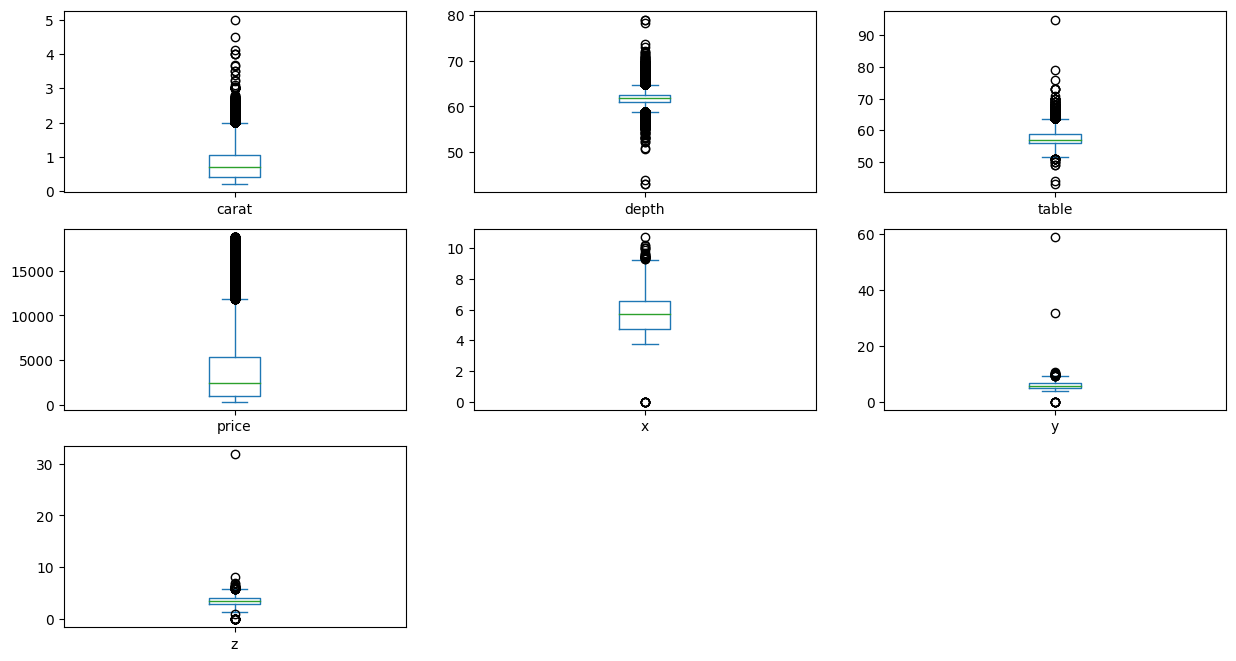

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,8))
plt.show()



*   **preprocessing**

---

In [ ]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
new_df = df[(df["depth"]<75)&(df["depth"]>45)]
new_df = df[(df["table"]<80)&(df["table"]>40)]
new_df = df[(df["x"]<30)]
new_df = df[(df["y"]<30)]
new_df = df[(df["z"]<30)&(df["z"]>2)]
new_df = df[(df["carat"]<4)]
new_df.shape

(53914, 10)

In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_df = new_df.copy()

label_df['clarity'] = LabelEncoder().fit_transform(label_df['clarity'])
label_df['color'] = LabelEncoder().fit_transform(label_df['color'])
label_df['cut'] = LabelEncoder().fit_transform(label_df['cut'])

label_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
label_df.duplicated().sum()

145

In [ ]:
data = label_df.drop_duplicates()

In [ ]:
data.shape

(53769, 10)


*   Load Data


---







In [ ]:
X = data.drop(["price"],axis =1)
y = data.price



*  Split data into training and testing

---






In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)



*   Data Scaling

---






In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_train = MMS.fit_transform(X_train)
X_test = MMS.transform(X_test)



*   Model Training


---








In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)



*   Make Prediction

---






In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.886829389585719

In [ ]:
w0_LR = linreg.intercept_
w_LR = linreg.coef_
print("Estimated coefficients by Linear Regression:\nw_0 = {}  \
      \nw = {}".format(w0_LR, w_LR))

Estimated coefficients by Linear Regression:
w_0 = 3631.137776369323        
w = [40253.66787762   279.25455064 -1614.44026711  1990.67147391
 -5765.84811163 -3027.69013175 -8535.65487516  2310.88800207
 -2083.98892579]
